# Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# READ DATA:

In [2]:
df = pd.read_csv("Airlines.csv")

In [3]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [5]:
#df.shape
df["Airline"].value_counts()

WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: Airline, dtype: int64

In [5]:
df.dtypes

id              int64
Airline        object
Flight          int64
AirportFrom    object
AirportTo      object
DayOfWeek       int64
Time            int64
Length          int64
Delay           int64
dtype: object

# EDA:

In [6]:
##check missing value:
missing_value =[feature for feature in df.columns if df[feature].isnull().sum()]
missing_value

[]

In [7]:
###Numeric Features
numeric_features=[feature for feature in df.columns if df[feature].dtype!="O"]
numeric_features

['id', 'Flight', 'DayOfWeek', 'Time', 'Length', 'Delay']

In [8]:
##Discrete Feature
Discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<25]
Discrete_features
#print("Discrete_features",len(Discrete_features))
print("Discrete variable count :{}".format(len(Discrete_features)))


Discrete variable count :2


In [9]:
##Continous Features:
continous_features = [feature for feature in numeric_features if feature not in Discrete_features]
continous_features

['id', 'Flight', 'Time', 'Length']

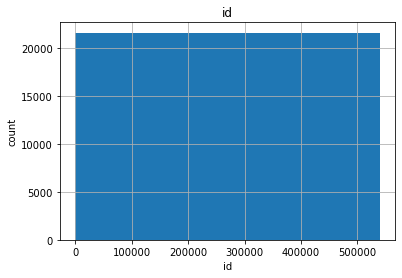

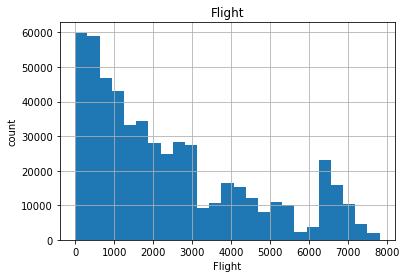

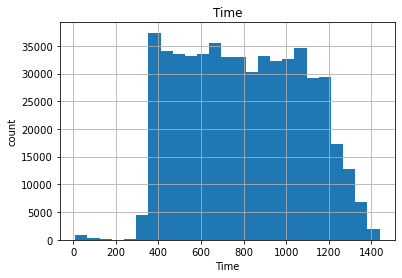

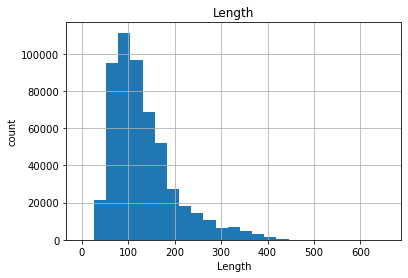

In [10]:
##let analysis the continous feature by creating histogram to understand :
for feature in continous_features:
    data =df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()
    

C:\Users\RNARESHD\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


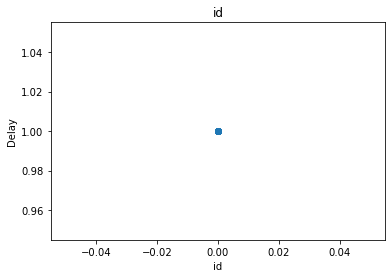

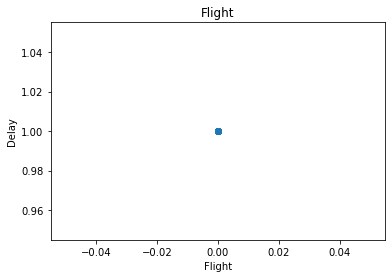

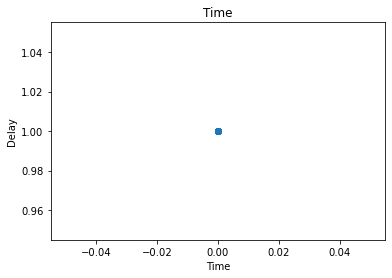

In [10]:
##logarithmic Transformation:
for feature in continous_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data[feature]=np.log(data["Delay"])
        plt.scatter(data[feature],data["Delay"])
        plt.xlabel(feature)
        plt.ylabel("Delay")
        plt.title(feature)
        plt.show()

In [11]:
df.columns

Index(['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Time', 'Length', 'Delay'],
      dtype='object')

<AxesSubplot:xlabel='Time', ylabel='Count'>

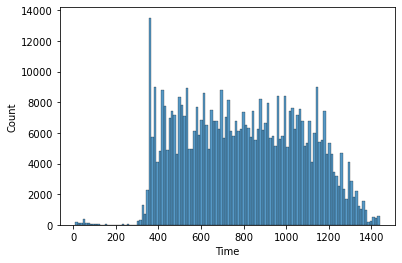

In [12]:
sns.histplot(df["Time"])

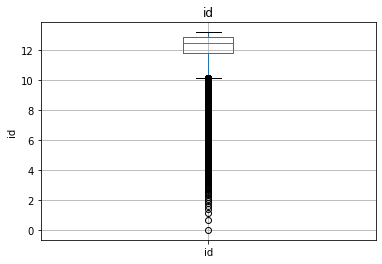

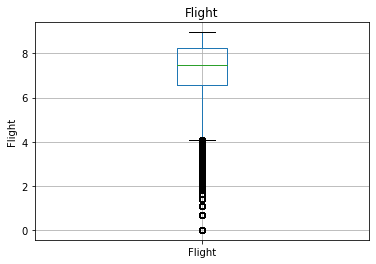

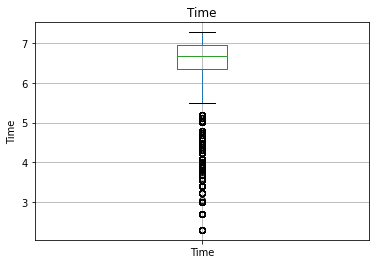

In [13]:
###To check outlier:
for feature in continous_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [14]:
##lets check categorical feature
categorical_feature=[feature for feature in df.columns if df[feature].dtype=="O"]
categorical_feature

['Airline', 'AirportFrom', 'AirportTo']

In [15]:
df['Airline'].value_counts()

WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: Airline, dtype: int64

In [16]:
df['AirportFrom'].unique()

array(['SFO', 'PHX', 'LAX', 'ANC', 'LAS', 'SLC', 'DEN', 'ONT', 'FAI',
       'BQN', 'PSE', 'HNL', 'BIS', 'IYK', 'EWR', 'BOS', 'MKE', 'GFK',
       'OMA', 'GSO', 'LMT', 'SEA', 'MCO', 'TPA', 'DLH', 'MSP', 'FAR',
       'MFE', 'MSY', 'VPS', 'BWI', 'MAF', 'LWS', 'RST', 'ALB', 'DSM',
       'CHS', 'MSN', 'JAX', 'SAT', 'PNS', 'BHM', 'LIT', 'SAV', 'BNA',
       'ICT', 'ECP', 'DHN', 'MGM', 'CAE', 'PWM', 'ACV', 'EKO', 'PHL',
       'ATL', 'PDX', 'RIC', 'BTR', 'HRL', 'MYR', 'TUS', 'SBN', 'CAK',
       'TVC', 'CLE', 'ORD', 'DAY', 'MFR', 'BTV', 'TLH', 'TYS', 'DFW',
       'FLL', 'AUS', 'CHA', 'CMH', 'LRD', 'BRO', 'CRP', 'LAN', 'PVD',
       'FWA', 'JFK', 'LGA', 'OKC', 'PIT', 'PBI', 'ORF', 'DCA', 'AEX',
       'SYR', 'SHV', 'VLD', 'BDL', 'FAT', 'BZN', 'RDM', 'LFT', 'IPL',
       'EAU', 'ERI', 'BUF', 'IAH', 'MCI', 'AGS', 'ABI', 'GRR', 'LBB',
       'CLT', 'LEX', 'MBS', 'MOD', 'AMA', 'SGF', 'AZO', 'ABE', 'SWF',
       'BGM', 'AVP', 'FNT', 'GSP', 'ATW', 'ITH', 'TUL', 'COS', 'ELP',
       'ABQ', 'SMF',

In [17]:
df['AirportFrom'].value_counts(100)

ATL    0.063867
ORD    0.046019
DFW    0.041073
DEN    0.036788
LAX    0.030882
         ...   
MMH    0.000030
SJT    0.000028
GUM    0.000019
ADK    0.000017
ABR    0.000004
Name: AirportFrom, Length: 293, dtype: float64

In [18]:
df["AirportFrom"].count()

539383

In [19]:
df["AirportTo"].unique()

array(['IAH', 'CLT', 'DFW', 'SEA', 'MSP', 'DTW', 'ORD', 'ATL', 'PDX',
       'JFK', 'SLC', 'HNL', 'PHX', 'MCO', 'OGG', 'LAX', 'KOA', 'ITO',
       'SFO', 'MIA', 'IAD', 'SMF', 'PHL', 'LIH', 'DEN', 'LGA', 'MEM',
       'CVG', 'YUM', 'CWA', 'MKE', 'BQN', 'FAI', 'LAS', 'ANC', 'BOS',
       'LGB', 'FLL', 'SJU', 'EWR', 'DCA', 'BWI', 'RDU', 'MCI', 'TYS',
       'SAN', 'ONT', 'OAK', 'MDW', 'BNA', 'DAL', 'CLE', 'JAX', 'JNU',
       'RNO', 'ELP', 'SAT', 'OTZ', 'MBS', 'BDL', 'STL', 'HOU', 'AUS',
       'SNA', 'SJC', 'LIT', 'TUS', 'TUL', 'CMH', 'LAN', 'IND', 'AMA',
       'CRP', 'PIT', 'RKS', 'FWA', 'TPA', 'PBI', 'JAN', 'DSM', 'ADQ',
       'GRB', 'PVD', 'ABQ', 'SDF', 'RSW', 'MSY', 'BUR', 'BOI', 'TLH',
       'BHM', 'ACV', 'ORF', 'BET', 'KTN', 'RIC', 'SRQ', 'BTR', 'XNA',
       'MHT', 'GRR', 'SBN', 'SBA', 'ROA', 'CID', 'GPT', 'MFR', 'SGU',
       'HPN', 'OMA', 'OTH', 'GSP', 'LMT', 'BUF', 'MSN', 'BFL', 'CAE',
       'HRL', 'OKC', 'SYR', 'COS', 'BTV', 'CDC', 'SCC', 'DAY', 'SJT',
       'TVC', 'ROC',

In [20]:
df["AirportTo"].value_counts()

ATL    34440
ORD    24871
DFW    22153
DEN    19848
LAX    16656
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportTo, Length: 293, dtype: int64

In [21]:
##Checking for wrong entry like symbol(!,@,#,$...):
for col in df.columns:
    print('{}:{}'.format(col,df[col].unique()))

id:[     1      2      3 ... 539381 539382 539383]
Airline:['CO' 'US' 'AA' 'AS' 'DL' 'B6' 'HA' 'OO' '9E' 'OH' 'EV' 'XE' 'YV' 'UA'
 'MQ' 'FL' 'F9' 'WN']
Flight:[ 269 1558 2400 ... 3413 3184 3387]
AirportFrom:['SFO' 'PHX' 'LAX' 'ANC' 'LAS' 'SLC' 'DEN' 'ONT' 'FAI' 'BQN' 'PSE' 'HNL'
 'BIS' 'IYK' 'EWR' 'BOS' 'MKE' 'GFK' 'OMA' 'GSO' 'LMT' 'SEA' 'MCO' 'TPA'
 'DLH' 'MSP' 'FAR' 'MFE' 'MSY' 'VPS' 'BWI' 'MAF' 'LWS' 'RST' 'ALB' 'DSM'
 'CHS' 'MSN' 'JAX' 'SAT' 'PNS' 'BHM' 'LIT' 'SAV' 'BNA' 'ICT' 'ECP' 'DHN'
 'MGM' 'CAE' 'PWM' 'ACV' 'EKO' 'PHL' 'ATL' 'PDX' 'RIC' 'BTR' 'HRL' 'MYR'
 'TUS' 'SBN' 'CAK' 'TVC' 'CLE' 'ORD' 'DAY' 'MFR' 'BTV' 'TLH' 'TYS' 'DFW'
 'FLL' 'AUS' 'CHA' 'CMH' 'LRD' 'BRO' 'CRP' 'LAN' 'PVD' 'FWA' 'JFK' 'LGA'
 'OKC' 'PIT' 'PBI' 'ORF' 'DCA' 'AEX' 'SYR' 'SHV' 'VLD' 'BDL' 'FAT' 'BZN'
 'RDM' 'LFT' 'IPL' 'EAU' 'ERI' 'BUF' 'IAH' 'MCI' 'AGS' 'ABI' 'GRR' 'LBB'
 'CLT' 'LEX' 'MBS' 'MOD' 'AMA' 'SGF' 'AZO' 'ABE' 'SWF' 'BGM' 'AVP' 'FNT'
 'GSP' 'ATW' 'ITH' 'TUL' 'COS' 'ELP' 'ABQ' 'SMF' 'STL' 'IAD' 'D

In [22]:
for feature in df.columns[:]:
    print(feature,":",len(df[feature].unique()),"lebals")

id : 539383 lebals
Airline : 18 lebals
Flight : 6585 lebals
AirportFrom : 293 lebals
AirportTo : 293 lebals
DayOfWeek : 7 lebals
Time : 1131 lebals
Length : 426 lebals
Delay : 2 lebals


In [23]:
df["AirportFrom"].value_counts().to_dict()

{'ATL': 34449,
 'ORD': 24822,
 'DFW': 22154,
 'DEN': 19843,
 'LAX': 16657,
 'IAH': 15821,
 'PHX': 15557,
 'DTW': 13136,
 'LAS': 11918,
 'SFO': 11786,
 'CLT': 11133,
 'MCO': 10596,
 'SLC': 10473,
 'MSP': 10166,
 'EWR': 9673,
 'JFK': 9496,
 'BOS': 9439,
 'BWI': 8565,
 'LGA': 8547,
 'SEA': 8038,
 'PHL': 7480,
 'MDW': 7103,
 'DCA': 7073,
 'MIA': 6716,
 'IAD': 6528,
 'MEM': 6450,
 'SAN': 6370,
 'TPA': 6085,
 'FLL': 5807,
 'STL': 5031,
 'CLE': 4783,
 'CVG': 4708,
 'HNL': 4454,
 'HOU': 4420,
 'BNA': 4353,
 'PDX': 4274,
 'MCI': 4237,
 'RDU': 4159,
 'MKE': 4068,
 'DAL': 3838,
 'OAK': 3783,
 'AUS': 3654,
 'SNA': 3535,
 'SMF': 3504,
 'MSY': 3400,
 'SJC': 3357,
 'SAT': 3272,
 'PIT': 3265,
 'IND': 3135,
 'ABQ': 2799,
 'JAX': 2738,
 'RSW': 2717,
 'CMH': 2657,
 'PBI': 2385,
 'BDL': 2280,
 'BUR': 2147,
 'OMA': 1971,
 'ONT': 1944,
 'BUF': 1938,
 'OKC': 1906,
 'SJU': 1895,
 'TUS': 1862,
 'ELP': 1818,
 'OGG': 1772,
 'BHM': 1756,
 'RNO': 1708,
 'TUL': 1664,
 'LIT': 1572,
 'RIC': 1556,
 'PVD': 1543,
 'ORF'

In [24]:
df["AirportTo"].value_counts().to_dict()

{'ATL': 34440,
 'ORD': 24871,
 'DFW': 22153,
 'DEN': 19848,
 'LAX': 16656,
 'IAH': 15819,
 'PHX': 15558,
 'DTW': 13146,
 'LAS': 11918,
 'SFO': 11792,
 'CLT': 11132,
 'MCO': 10605,
 'SLC': 10486,
 'MSP': 10181,
 'EWR': 9670,
 'JFK': 9490,
 'BOS': 9429,
 'BWI': 8557,
 'LGA': 8549,
 'SEA': 8042,
 'PHL': 7478,
 'MDW': 7102,
 'DCA': 7068,
 'MIA': 6720,
 'IAD': 6565,
 'MEM': 6450,
 'SAN': 6372,
 'TPA': 6086,
 'FLL': 5812,
 'STL': 5034,
 'CLE': 4730,
 'CVG': 4713,
 'HNL': 4453,
 'HOU': 4419,
 'BNA': 4300,
 'PDX': 4274,
 'MCI': 4250,
 'RDU': 4147,
 'MKE': 4070,
 'DAL': 3835,
 'OAK': 3781,
 'AUS': 3655,
 'SNA': 3535,
 'SMF': 3473,
 'MSY': 3401,
 'SJC': 3357,
 'PIT': 3270,
 'SAT': 3267,
 'IND': 3167,
 'ABQ': 2800,
 'JAX': 2739,
 'RSW': 2719,
 'CMH': 2652,
 'PBI': 2388,
 'BDL': 2281,
 'BUR': 2146,
 'OMA': 1971,
 'BUF': 1970,
 'ONT': 1943,
 'OKC': 1908,
 'SJU': 1903,
 'TUS': 1862,
 'ELP': 1818,
 'OGG': 1803,
 'BHM': 1778,
 'RNO': 1709,
 'TUL': 1656,
 'LIT': 1572,
 'RIC': 1554,
 'PVD': 1539,
 'ORF'

In [25]:
##Convert categorical feature into numeric from:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Airline'] = lb.fit_transform(df["Airline"])
df['AirportFrom'] = lb.fit_transform(df["AirportFrom"])
df['AirportTo'] = lb.fit_transform(df["AirportTo"])


In [26]:
df.head(5)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,4,269,253,135,3,15,205,1
1,2,14,1558,217,60,3,15,222,1
2,3,1,2400,154,80,3,20,165,1
3,4,1,2466,253,80,3,20,195,1
4,5,2,108,14,252,3,30,202,0


In [27]:
df["Delay"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='Delay', ylabel='count'>

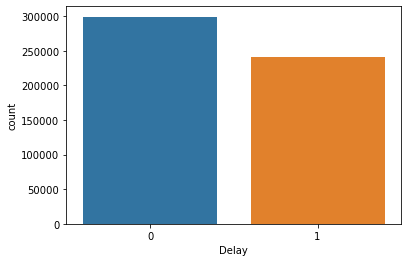

In [28]:
sns.countplot(x="Delay",data=df)

In [29]:
df["Delay"].value_counts()

0    299119
1    240264
Name: Delay, dtype: int64

# Feature Engineernig:

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [36]:
##independent and dependent Feature:
x=df.drop("Delay",axis=1)
y=df["Delay"]

In [37]:
## apply the selectKBest class to extract best feature:
bestfeature = SelectKBest(score_func = chi2, k=6)
fit =bestfeature.fit(x,y)

In [38]:
dfscore=pd.DataFrame(fit.scores_)
dfcolumn=pd.DataFrame(x.columns)

In [39]:
##concat two data frame for best visulation:
featureScores=pd.concat([dfcolumn,dfscore],axis=1)
featureScores.columns = ["Specs","Score"]

In [40]:
featureScores

,Specs,Score
0,id,9.471504e+08
1,Airline,7.289755e+03
2,Flight,2.024550e+06
3,AirportFrom,8.035527e+03
4,AirportTo,5.426548e+04
5,DayOfWeek,3.453861e+02
6,Time,1.175890e+06
7,Length,3.288437e+04


In [41]:
print(featureScores.nlargest(6,"Score"))

         Specs         Score
0           id  9.471504e+08
2       Flight  2.024550e+06
6         Time  1.175890e+06
4    AirportTo  5.426548e+04
7       Length  3.288437e+04
3  AirportFrom  8.035527e+03


In [42]:
from sklearn.preprocessing  import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop("Delay",axis=1))

StandardScaler()

In [43]:
scaled_features = scaler.transform(df.drop("Delay",axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head(3)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length
0,-1.732048,-1.005308,-1.044258,1.371682,-0.115221,-0.485552,-2.833092,1.038237
1,-1.732041,0.879222,-0.420778,0.918165,-1.060364,-0.485552,-2.833092,1.280689
2,-1.732035,-1.570667,-0.013509,0.124511,-0.808326,-0.485552,-2.815110,0.467761


In [44]:
df_feat.drop("Length",axis=1,inplace = True)


C:\Users\RNARESHD\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length'>

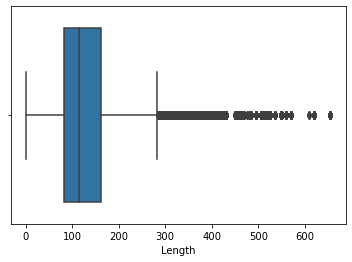

In [45]:
sns.boxplot(df["Length"])

In [46]:
df_feat.head(2)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time
0,-1.732048,-1.005308,-1.044258,1.371682,-0.115221,-0.485552,-2.833092
1,-1.732041,0.879222,-0.420778,0.918165,-1.060364,-0.485552,-2.833092


In [47]:
##independent and dependent Feature:
x=df.drop("Delay",axis=1)
y=df["Delay"]

In [48]:
##Split dataset into X and Y train:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [49]:
x_train

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length
448331,448332,1,1638,80,22,7,1210,190
31507,31508,1,2493,22,80,4,1055,255
54212,54213,14,86,205,217,6,360,175
145872,145873,13,285,134,253,4,740,367
52426,52427,15,115,214,153,5,1205,125
...,...,...,...,...,...,...,...,...
359783,359784,0,3656,84,177,2,990,100
152315,152316,2,755,268,252,4,1080,268
117952,117953,8,917,45,184,2,1139,124
435829,435830,15,19,172,75,7,540,95


In [50]:
##Fitting the linear model for train data:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [51]:
##Aply Scaler
#from sklearn.preprocessing import StandardScaler
#scalr =StandardScaler().fit(x_train)
#print(scalr)

In [52]:
#x_train_scale=scalr.transform(x_train)
#print(x_train_scale)

In [53]:
#scalr =StandardScaler().fit(x_test)
#print(scalr)
#x_test_scale=scalr.transform(x_test)
#print(x_test_scale)

In [54]:
#prediction:
y_pred = log_reg.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [55]:
##Accuracy score:
from sklearn.metrics import accuracy_score, classification_report
score=accuracy_score(y_pred,y_test)
print(score)

0.5714193016120211


In [56]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.59      0.65     73622
           1       0.37      0.52      0.44     34255

    accuracy                           0.57    107877
   macro avg       0.55      0.56      0.55    107877
weighted avg       0.62      0.57      0.59    107877



In [57]:
##Fitted on knn model:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print("with k = 3")
print('\n')
#print(confusion_matrix(y_test,pred))
#print('\n')
print(classification_report(pred,y_test))
print("\n")
score=accuracy_score(y_pred,y_test)
print(score)

with k = 3


              precision    recall  f1-score   support

           0       0.64      0.62      0.63     62765
           1       0.50      0.53      0.51     45112

    accuracy                           0.58    107877
   macro avg       0.57      0.57      0.57    107877
weighted avg       0.58      0.58      0.58    107877



0.5714193016120211


In [58]:
error_rate = []

for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

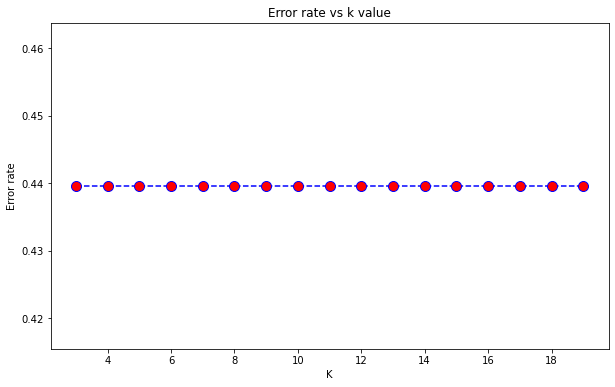

In [307]:
plt.figure(figsize=(10,6))
plt.plot(range(3,20),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title("Error rate vs k value")
plt.xlabel('K')
plt.ylabel("Error rate")

In [5]:
##Handling imbalanced data:

In [4]:
df["Delay"].value_counts()

0    299119
1    240264
Name: Delay, dtype: int64

In [6]:
x=df.drop('Delay',axis=1)
y=df["Delay"]

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [71]:
log_class =LogisticRegression()
grid = {'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [73]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(x_train,y_train)

C:\Users\RNARESHD\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\RNARESHD\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RNARESHD\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\RNARESHD\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise Value

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [ ]:
##Split dataset into X and Y train:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [78]:
y_pred =clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[43701 16313]
 [29921 17942]]
0.5714193016120211
              precision    recall  f1-score   support

           0       0.59      0.73      0.65     60014
           1       0.52      0.37      0.44     47863

    accuracy                           0.57    107877
   macro avg       0.56      0.55      0.55    107877
weighted avg       0.56      0.57      0.56    107877



In [82]:
class_weight =dict({0:1,1:100})

In [88]:
from sklearn.ensemble import RandomForestClassifier 
clrf = RandomForestClassifier(class_weight=class_weight)
clrf.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [90]:
y_pred = clrf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[47990 12024]
 [21307 26556]]
0.6910277445609352
              precision    recall  f1-score   support

           0       0.69      0.80      0.74     60014
           1       0.69      0.55      0.61     47863

    accuracy                           0.69    107877
   macro avg       0.69      0.68      0.68    107877
weighted avg       0.69      0.69      0.69    107877



In [ ]:
# y_pred = clrf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

# Balence Data:

In [98]:
##Under sampling:
from collections import Counter 
Counter(y_train)

Counter({0: 239105, 1: 192401})

In [104]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler  

ns = RandomUnderSampler()
x_train_ns, y_train_ns = ns.fit_resample(x_train,y_train)
print("the number of class before fit {}".format(Counter(y_train)))
print("the number of class after fit {}".format(Counter(y_train_ns)))

the number of class before fit Counter({0: 239105, 1: 192401})
the number of class after fit Counter({0: 192401, 1: 192401})


In [107]:
from sklearn.ensemble import RandomForestClassifier 
clrf = RandomForestClassifier()
clrf.fit(x_train_ns, y_train_ns)

RandomForestClassifier()

In [108]:
y_pred =clrf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[41819 18195]
 [16024 31839]]
0.6827961474642417
              precision    recall  f1-score   support

           0       0.72      0.70      0.71     60014
           1       0.64      0.67      0.65     47863

    accuracy                           0.68    107877
   macro avg       0.68      0.68      0.68    107877
weighted avg       0.68      0.68      0.68    107877



In [113]:
##OverSampling:
from imblearn.over_sampling import RandomOverSampler 
os = RandomOverSampler()
x_train_ns, y_train_ns = os.fit_resample(x_train,y_train)
print("the number of class before fit {}".format(Counter(y_train)))
print("the number of class after fit {}".format(Counter(y_train_ns)))

the number of class before fit Counter({0: 239105, 1: 192401})
the number of class after fit Counter({0: 239105, 1: 239105})


In [114]:
from sklearn.ensemble import RandomForestClassifier 
clrf = RandomForestClassifier()
clrf.fit(x_train_ns, y_train_ns)

RandomForestClassifier()

In [115]:
y_pred =clrf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[44646 15368]
 [18149 29714]]
0.6893035586825736
              precision    recall  f1-score   support

           0       0.71      0.74      0.73     60014
           1       0.66      0.62      0.64     47863

    accuracy                           0.69    107877
   macro avg       0.69      0.68      0.68    107877
weighted avg       0.69      0.69      0.69    107877



In [116]:
##SMOTHTomek technique:

In [120]:
from imblearn.combine import SMOTETomek

In [123]:
os = SMOTETomek()
x_train_ns, y_train_ns = os.fit_resample(x_train,y_train)
print("the number of class before fit {}".format(Counter(y_train)))
print("the number of class after fit {}".format(Counter(y_train_ns)))

the number of class before fit Counter({0: 239105, 1: 192401})
the number of class after fit Counter({0: 197703, 1: 197703})


In [124]:
from sklearn.ensemble import RandomForestClassifier 
clrf = RandomForestClassifier()
clrf.fit(x_train_ns, y_train_ns)

RandomForestClassifier()

In [125]:
y_pred =clrf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[44376 15638]
 [18154 29709]]
0.6867543591312328
              precision    recall  f1-score   support

           0       0.71      0.74      0.72     60014
           1       0.66      0.62      0.64     47863

    accuracy                           0.69    107877
   macro avg       0.68      0.68      0.68    107877
weighted avg       0.69      0.69      0.69    107877



In [131]:
##Ensemble techiques:
from imblearn.ensemble import EasyEnsembleClassifier
easy = EasyEnsembleClassifier()
easy.fit(x_train,y_train)

EasyEnsembleClassifier()

In [132]:
y_pred =easy.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[37663 22351]
 [16203 31660]]
0.6426114927185591
              precision    recall  f1-score   support

           0       0.70      0.63      0.66     60014
           1       0.59      0.66      0.62     47863

    accuracy                           0.64    107877
   macro avg       0.64      0.64      0.64    107877
weighted avg       0.65      0.64      0.64    107877



In [31]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
539378    False
539379    False
539380    False
539381    False
539382    False
Length: 539383, dtype: bool